In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
import os

In [4]:
labels=list()
path='YogaPoses/'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)
    

In [5]:
labels

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

In [6]:
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :Downdog= 196
Length of :Goddess= 199
Length of :Plank= 197
Length of :Tree= 198
Length of :Warrior2= 198
Total Samples:988


In [7]:
!pip install tqdm
from tqdm import tqdm

Preprocessing Images
* Resizing
* Scaling



In [9]:
img_size=170     # 170x170
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<300:
            img_file=imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

100%|██████████| 198/198 [00:03<00:00, 49.85it/s]


In [10]:
X[0]   ## Skimage scale image in range of 0 to 1


array([[[0.97647059, 0.97647059, 0.97647059],
        [0.97647059, 0.97647059, 0.97647059],
        [0.97647059, 0.97647059, 0.97647059],
        ...,
        [0.95294118, 0.95294118, 0.95294118],
        [0.95294118, 0.95294118, 0.95294118],
        [0.95294118, 0.95294118, 0.95294118]],

       [[0.97647059, 0.97647059, 0.97647059],
        [0.97647059, 0.97647059, 0.97647059],
        [0.97647059, 0.97647059, 0.97647059],
        ...,
        [0.95294118, 0.95294118, 0.95294118],
        [0.95294118, 0.95294118, 0.95294118],
        [0.95294118, 0.95294118, 0.95294118]],

       [[0.97647059, 0.97647059, 0.97647059],
        [0.97647059, 0.97647059, 0.97647059],
        [0.97647059, 0.97647059, 0.97647059],
        ...,
        [0.95294118, 0.95294118, 0.95294118],
        [0.95294118, 0.95294118, 0.95294118],
        [0.95294118, 0.95294118, 0.95294118]],

       ...,

       [[0.94117647, 0.94117647, 0.94117647],
        [0.94117647, 0.94117647, 0.94117647],
        [0.94117647, 0

***Visualizing the Images***

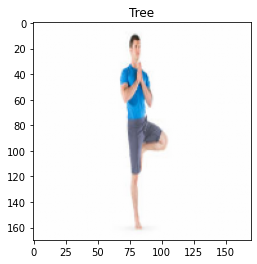

In [11]:
plt.imshow(X[601])
plt.title(labels[Y[601]])
plt.show()

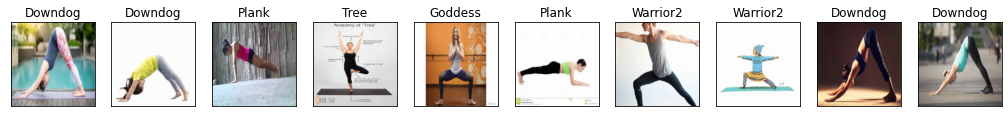

In [12]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

*Spliting the Data into the train & test*

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [23]:
print('Shapes of Data Split into Train & Tet Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')


Shapes of Data Split into Train & Tet Part
Training Data->(790, 170, 170, 3),(790,) Testing Data->((198, 170, 170, 3), (198,))


In [24]:

#OneHot-Encoding
from keras.utils.np_utils import to_categorical
Y_train =to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [25]:
Y_train.shape,Y_test.shape


((790, 5), (198, 5))

**Building the CNN Model**

In [26]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [27]:
model=Sequential()
model.add(Conv2D(64,(5,5),padding='same',activation='relu',input_shape=(170,170,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(len(labels),activation='softmax'))  # Multi-class Classification Problem
model.compile(loss='categorical_crossentropy',optimizer='adam'
             ,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 170, 170, 64)      4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 85, 85, 32)        32800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 42, 42, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 21, 21, 128)     

In [29]:
from time import time
tic=time()
epoch=10
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=epoch,batch_size=32,verbose=1)
toc=time()
print(f'Training Time {toc-tic}')

Epoch 1/10
20/20 [==============================] - 39s 2s/step - loss: 1.5848 - accuracy: 0.2468 - val_loss: 1.2761 - val_accuracy: 0.4873
Epoch 2/10
20/20 [==============================] - 38s 2s/step - loss: 1.2930 - accuracy: 0.5047 - val_loss: 0.9874 - val_accuracy: 0.6772
Epoch 3/10
20/20 [==============================] - 38s 2s/step - loss: 0.9052 - accuracy: 0.6725 - val_loss: 1.0300 - val_accuracy: 0.6329
Epoch 4/10
20/20 [==============================] - 37s 2s/step - loss: 0.8058 - accuracy: 0.7104 - val_loss: 0.7464 - val_accuracy: 0.7532
Epoch 5/10
20/20 [==============================] - 39s 2s/step - loss: 0.5227 - accuracy: 0.8022 - val_loss: 0.7152 - val_accuracy: 0.7722
Epoch 6/10
20/20 [==============================] - 38s 2s/step - loss: 0.3528 - accuracy: 0.8766 - val_loss: 0.7295 - val_accuracy: 0.7722
Epoch 7/10
20/20 [==============================] - 38s 2s/step - loss: 0.2493 - accuracy: 0.9241 - val_loss: 0.8555 - val_accuracy: 0.7975
Epoch 8/10
20/20 [==

Text(0.5, 1.0, 'Loss evolution')

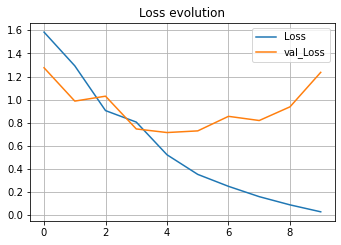

In [30]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

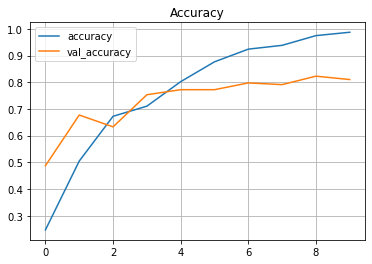

In [31]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

**Saving the Model**

In [33]:
model.save('./Simple_CNN_model.h5')

**Evaluating the Model**

In [35]:
score=model.evaluate(X_test,Y_test,verbose=1)


7/7 [==============================] - 2s 224ms/step - loss: 2.0956 - accuracy: 0.7778


In [36]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

7/7 [==============================] - 2s 200ms/step
[1 3 1 4 3 2 2 1 4 4 3 4 0 2 2 2 1 2 4 2 2 1 4 2 0 3 4 3 3 0 3 1 1 2 4 1 2
 3 4 1 0 0 2 3 4 1 0 4 1 0 0 0 3 4 4 0 0 4 0 2 2 1 0 4 4 2 1 4 3 1 4 3 2 1
 2 3 4 0 4 3 4 0 0 3 4 3 4 0 1 0 1 4 3 2 0 1 2 3 4 3 3 4 4 1 1 0 4 4 0 2 3
 0 4 4 3 2 2 3 4 3 4 2 2 2 2 2 3 1 3 1 4 0 0 2 2 4 1 2 4 2 1 0 2 2 0 4 3 3
 0 0 1 2 2 3 1 4 4 4 2 1 2 4 1 1 0 1 3 1 4 2 2 2 4 4 4 0 0 1 2 3 1 0 2 3 2
 4 0 0 1 1 1 3 4 1 3 4 4 1]


In [37]:
Y_test=np.argmax(Y_test,axis=1)


In [38]:
print(Y_test)


[3 3 4 4 3 2 2 1 4 0 3 4 2 2 2 2 1 2 4 2 1 1 4 3 0 3 4 3 3 0 3 1 1 2 1 1 2
 3 4 0 3 0 0 3 4 1 3 4 1 0 0 0 3 4 4 0 0 4 0 0 2 0 0 4 4 2 1 4 3 1 4 3 2 1
 4 3 4 0 4 3 4 0 0 3 4 0 4 0 2 0 1 4 3 2 2 0 2 3 4 3 3 4 1 1 1 0 1 3 0 0 3
 0 1 1 3 2 1 3 4 3 1 3 2 2 2 2 3 4 3 1 4 0 0 2 3 4 1 2 4 2 4 0 2 2 0 1 1 3
 0 0 1 2 2 3 1 4 4 1 2 1 2 1 1 1 2 2 3 4 1 2 0 2 4 4 1 0 0 1 2 3 1 2 2 3 2
 4 0 0 0 1 0 3 4 1 3 3 4 1]


In [39]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,y_pred))


[[28  5  4  1  1]
 [ 0 26  2  1 11]
 [ 4  2 33  0  0]
 [ 2  1  3 32  2]
 [ 0  4  1  0 35]]


**Classification Report**

In [40]:
print(metrics.classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.72      0.77        39
           1       0.68      0.65      0.67        40
           2       0.77      0.85      0.80        39
           3       0.94      0.80      0.86        40
           4       0.71      0.88      0.79        40

    accuracy                           0.78       198
   macro avg       0.79      0.78      0.78       198
weighted avg       0.79      0.78      0.78       198



7/7 [==============================] - 2s 218ms/step


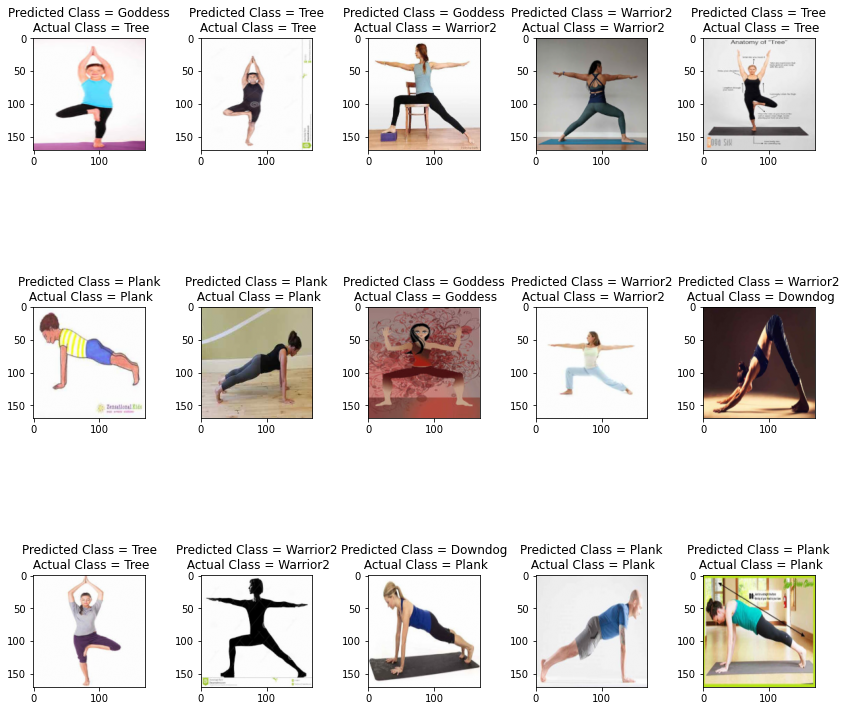

In [41]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)
